# Load Datasets & Quick EDA

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## FD Dataset 



In [ ]:
import warnings 

warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd

df_train = pd.read_csv("/content/drive/MyDrive/Dataset/train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/Dataset/test.csv")

df = df_train.append(df_test, ignore_index=True)

df_val = pd.read_csv("/content/drive/MyDrive/Dataset/valid.csv")

df = df.append(df_val, ignore_index=True)
df = df.drop(columns=['id'])
df.head()

,text,label
0,Nikmati cicilan 0% hingga 12 bulan untuk pemes...,neutral
1,Kue-kue yang disajikan bikin saya bernostalgia...,positive
2,Ibu pernah bekerja di grab indonesia,neutral
3,Paling suka banget makan siang di sini ayam sa...,positive
4,Pelayanan bus DAMRI sangat baik,positive


In [ ]:
df.shape

(1000, 2)

In [ ]:
df.label.value_counts()#dataset_fd

negative    383
positive    378
neutral     239
Name: label, dtype: int64

## Challange Dataset

In [ ]:
df_challange = pd.read_csv("/content/drive/MyDrive/Dataset/data.csv", encoding='ISO-8859-1')
df_challange.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0


In [ ]:
cols = df_challange.columns[1:]
cols

Index(['HS', 'Abusive', 'HS_Individual', 'HS_Group', 'HS_Religion', 'HS_Race',
       'HS_Physical', 'HS_Gender', 'HS_Other', 'HS_Weak', 'HS_Moderate',
       'HS_Strong'],
      dtype='object')

In [ ]:
df_challange['label'] = df_challange[cols].any(axis=1).astype(int)
df_challange.head()

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,label
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,1
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,1
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,1


In [ ]:
df_challange = df_challange.drop(columns=cols)

In [ ]:
df_challange.columns = ['text','label']
df_challange.head()

,text,label
0,- disaat semua cowok berusaha melacak perhatia...,1
1,RT USER: USER siapa yang telat ngasih tau elu?...,1
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1


In [ ]:
df_challange.label.value_counts()

1    7309
0    5860
Name: label, dtype: int64

In [ ]:
df_challange = df_challange.replace({1: 'negative', 0: 'positive'})
df_challange.head()

,text,label
0,- disaat semua cowok berusaha melacak perhatia...,negative
1,RT USER: USER siapa yang telat ngasih tau elu?...,negative
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",positive
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,positive
4,USER USER Kaum cebong kapir udah keliatan dong...,negative


## IndoNLU Dataset

In [ ]:
df_indonlu_test = pd.read_csv("/content/drive/MyDrive/Dataset/test_preprocess.tsv", sep='\t', header= None)
df_indonlu_train = pd.read_csv("/content/drive/MyDrive/Dataset/train_preprocess.tsv", sep='\t', header= None)
df_indonlu_valid = pd.read_csv("/content/drive/MyDrive/Dataset/valid_preprocess.tsv", sep='\t', header= None)

df_indonlu = df_indonlu_train.append(df_indonlu_test, ignore_index=True)
df_indonlu = df_indonlu.append(df_indonlu_valid, ignore_index=True)
df_indonlu.columns = ['text','label']
df_indonlu.head()

,text,label
0,warung ini dimiliki oleh pengusaha pabrik tahu...,positive
1,mohon ulama lurus dan k212 mmbri hujjah partai...,neutral
2,lokasi strategis di jalan sumatera bandung . t...,positive
3,betapa bahagia nya diri ini saat unboxing pake...,positive
4,duh . jadi mahasiswa jangan sombong dong . kas...,negative


In [ ]:
df_indonlu.label.value_counts()

positive    7359
negative    4034
neutral     1367
Name: label, dtype: int64

In [ ]:
df_indonlu.shape

(12760, 2)

# EDA (Exploratory Data Analysis)

In [ ]:
print(df.shape, df_challange.shape, df_indonlu.shape)

(1000, 2) (13169, 2) (12760, 2)


In [ ]:
print(df.columns, df_challange.columns, df_indonlu.columns)

Index(['text', 'label'], dtype='object') Index(['text', 'label'], dtype='object') Index(['text', 'label'], dtype='object')


In [ ]:
df_final = df.append(df_challange, ignore_index=True)
df_final = df_final.append(df_indonlu, ignore_index=True)
df_final.shape

(26929, 2)

In [ ]:
# df_final = df_final.drop(df_final[df_final['label'] == 'neutral'].index)

In [ ]:
df_final.label.value_counts()

positive    13597
negative    11726
neutral      1606
Name: label, dtype: int64

In [ ]:
df = df_final.copy()

In [ ]:
df['total_char'] = df.text.apply(len)
df['total_word'] = df.text.apply(lambda sent: len(sent.split()))

In [ ]:
df.head()

,text,label,total_char,total_word
0,Nikmati cicilan 0% hingga 12 bulan untuk pemes...,neutral,98,16
1,Kue-kue yang disajikan bikin saya bernostalgia...,positive,151,22
2,Ibu pernah bekerja di grab indonesia,neutral,36,6
3,Paling suka banget makan siang di sini ayam sa...,positive,355,57
4,Pelayanan bus DAMRI sangat baik,positive,31,5


## Univariate Analysis


*   Analisa melibatkan satu Variable




### measure of central tendency


*   mendeskripsikan frekuensi (mean, median, mode) suatu kelompok



In [ ]:
df.mean() #mean: rata-rata

total_char    150.053065
total_word     24.746296
dtype: float64

In [ ]:
df.median() #median: nilai tengah

total_char    123.0
total_word     20.0
dtype: float64

In [ ]:
df['total_char'].mode() #mode: freq data karakter yang sering muncul

0    254
Name: total_char, dtype: int64

In [ ]:
df['total_word'].mode() #mode: freq data kata yang sering muncul

0    11
Name: total_word, dtype: int64

In [ ]:
#range: perbedaan/selisih min dan max (kata)

range_total_word = df.total_word.max() - df.total_word.min()
range_total_word

109

In [ ]:
#range: perbedaan/selisih min dan max (karakter)

range_total_char = df.total_char.max() - df.total_char.min()
range_total_char

564

In [ ]:
#quartile dan interquartile range (karakter)

#cari nilai minimum
p0 = df.total_char.min()

#cari nilai minimum
p100 = df.total_char.max()

#cari quartile 1
q1 = df.total_char.quantile(0.25)

#cari quartile 2
q2 = df.total_char.quantile(0.5)

#cari quartile 3
q3 = df.total_char.quantile(0.75)

#cari IQR (interquartile range)
iqr = q3-q1

#cari batas bawah
lower_limit_char = q1-1.5*iqr

#cari batas atas
upper_limit_char = q3+1.5*iqr

print("batas bawah `total_char` : ", lower_limit_char)
print("nilai minimum", p0)

if lower_limit_char < p0:
  print("tidak ada outlier dari sisi batas bawah")
else:
  print("ada outlier dari sisi batas bawah")

print()

print("batas atas `total_char` : ", upper_limit_char)
print("nilai minimum", p100)

if upper_limit_char > p100:
  print("tidak ada outlier dari sisi batas atas")
else:
  print("ada outlier dari sisi batas atas")

batas bawah `total_char` :  -140.0
nilai minimum 3
tidak ada outlier dari sisi batas bawah

batas atas `total_char` :  420.0
nilai minimum 567
ada outlier dari sisi batas atas


In [ ]:
#quartile dan interquartile range (kata)

#cari nilai minimum
pp0 = df.total_word.min()

#cari nilai minimum
pp100 = df.total_word.max()

#cari quartile 1
qq1 = df.total_word.quantile(0.25)

#cari quartile 2
qq2 = df.total_word.quantile(0.5)

#cari quartile 3
qq3 = df.total_word.quantile(0.75)

#cari IQR (interquartile range)
iqrr = qq3-qq1

#cari batas bawah
lower_limit_word = qq1-1.5*iqrr

#cari batas atas
upper_limit_word = qq3+1.5*iqrr

print("batas bawah `total_word` : ", lower_limit_word)
print("nilai minimum", pp0)

if lower_limit_word < pp0:
  print("tidak ada outlier dari sisi batas bawah")
else:
  print("ada outlier dari sisi batas bawah")

print()

print("batas atas `total_word` : ", upper_limit_word)
print("nilai minimum", pp100)

if upper_limit_word > pp100:
  print("tidak ada outlier dari sisi batas atas")
else:
  print("ada outlier dari sisi batas atas")

batas bawah `total_word` :  -23.5
nilai minimum 1
tidak ada outlier dari sisi batas bawah

batas atas `total_word` :  68.5
nilai minimum 110
ada outlier dari sisi batas atas


In [ ]:
#variance : seberapa jauh jarak data tersebar dari mean

print(df.mean())
print(df.var())

total_char    150.053065
total_word     24.746296
dtype: float64
total_char    10762.574538
total_word      323.895005
dtype: float64


In [ ]:
#standar deviation : mengukur penyebaran observasi dalam kumpulan data relatif terhadap rata-ratanya

print(df.mean())
print(df.std())

total_char    150.053065
total_word     24.746296
dtype: float64
total_char    103.742829
total_word     17.997083
dtype: float64


### measure of describe shape of distribution


*   mendeskripsikan atau persebaran data berdasarkan grafik(skewness, kurtosis)



In [ ]:
#skewness: mengukur ketidaksimestrisan suatu distribusi nilai

df.skew()

total_char    1.012894
total_word    1.157154
dtype: float64

In [ ]:
#kurtosis: menunjukan derajat keruncingan

df.kurtosis()

total_char    0.404208
total_word    0.736980
dtype: float64

### Visualisasi Pie

<Axes: ylabel='label'>

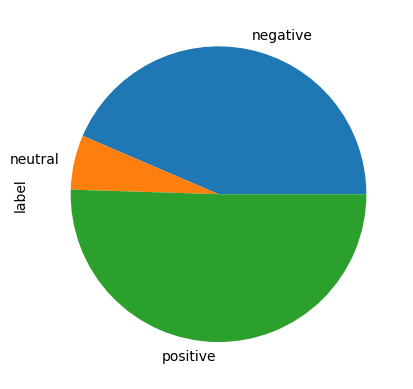

In [ ]:
df.groupby('label').label.count().plot(kind= 'pie')

### Visualisasi Histogram

<Axes: >

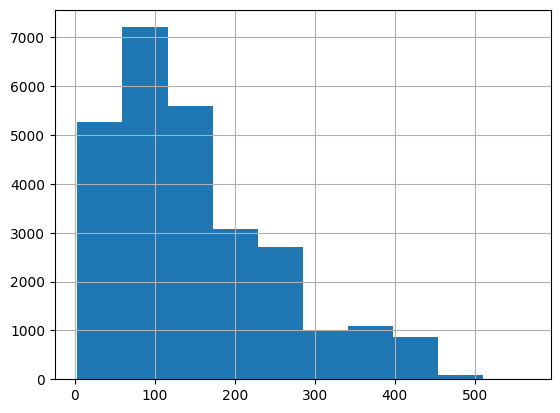

In [ ]:
df.total_char.hist() #karakter

<Axes: >

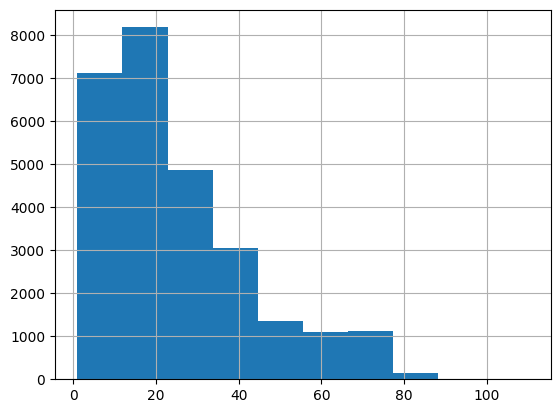

In [ ]:
df.total_word.hist() #kata

array([[<Axes: title={'center': 'total_char'}>,
        <Axes: title={'center': 'total_word'}>]], dtype=object)

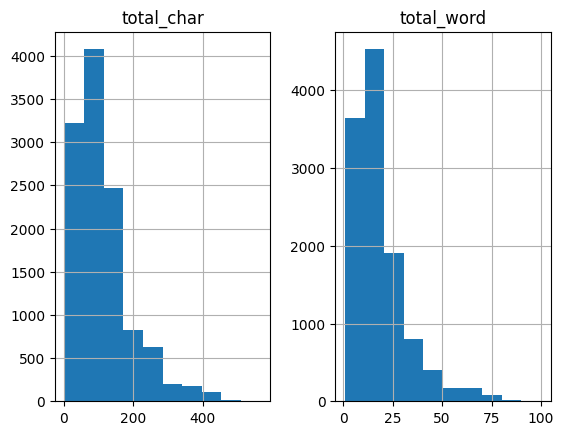

In [ ]:
df_negative = df.loc[df['label']=='negative'] #label negatif
df_negative.hist()

array([[<Axes: title={'center': 'total_char'}>,
        <Axes: title={'center': 'total_word'}>]], dtype=object)

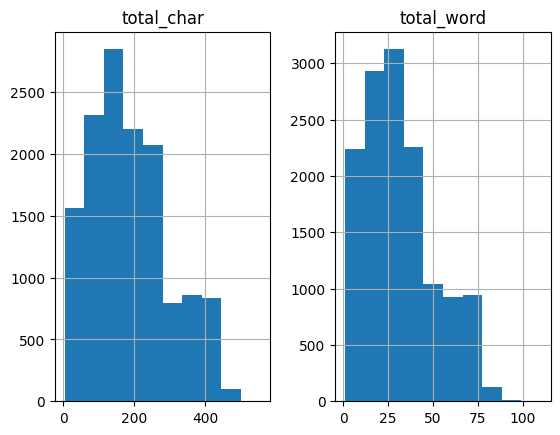

In [ ]:
df_positive = df.loc[df['label']=='positive'] #label positif
df_positive.hist()

array([[<Axes: title={'center': 'total_char'}>,
        <Axes: title={'center': 'total_word'}>]], dtype=object)

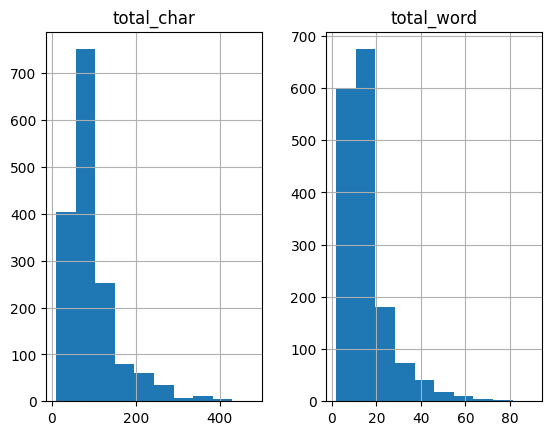

In [ ]:
df_neutral = df.loc[df['label']=='neutral'] #label netral
df_neutral.hist()

### Visualisasi Wordcloud

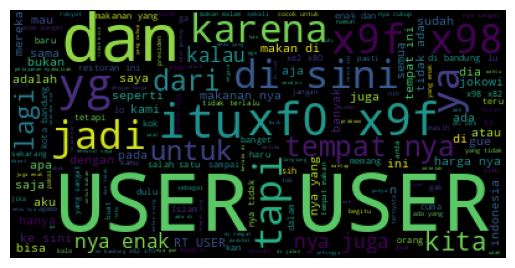

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
text = ' '.join(df['text'])
wordcloud = WordCloud().generate(text)

#Generate Plot
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

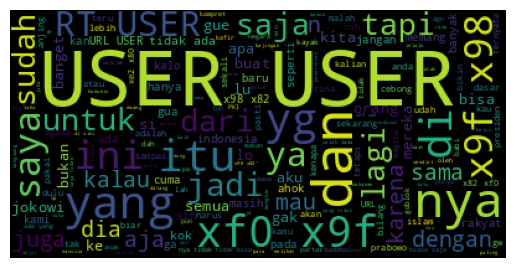

In [ ]:
from wordcloud import WordCloud

df_negative = df.loc[df['label']=='negative']

text = ' '.join(df_negative['text'])
wordcloud = WordCloud().generate(text)

#Generate Plot Label Negatif
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

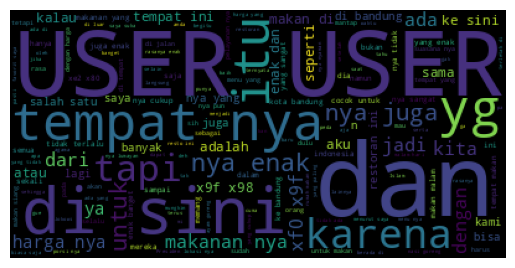

In [ ]:
from wordcloud import WordCloud

df_positive = df.loc[df['label']=='positive']

text = ' '.join(df_positive['text'])
wordcloud = WordCloud().generate(text)

#Generate Plot Label Positif
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

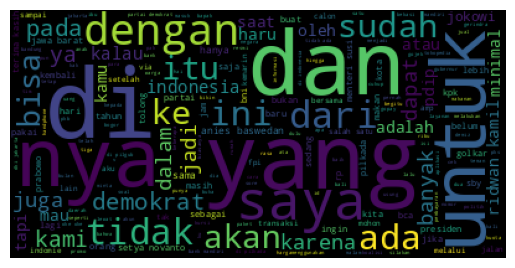

In [ ]:
from wordcloud import WordCloud

df_neutral = df.loc[df['label']=='neutral']

text = ' '.join(df_neutral['text'])
wordcloud = WordCloud().generate(text)

#Generate Plot Label Netral
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## Bivariate Analysis


*   Analisa melibatkan dua variable





In [ ]:
df.corr()

,total_char,total_word
total_char,1.000000,0.980237
total_word,0.980237,1.000000


<Axes: xlabel='total_word', ylabel='total_char'>

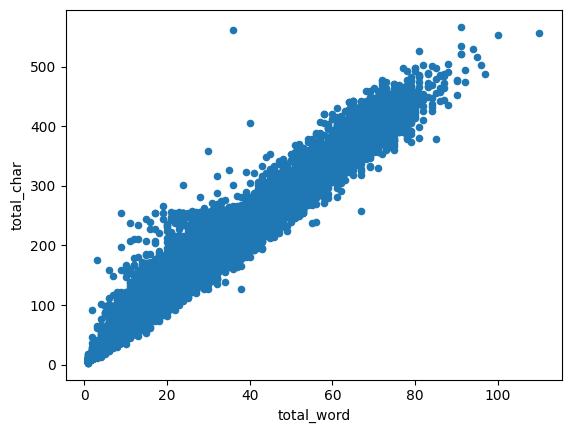

In [ ]:
df.plot(x="total_word", y="total_char", kind="scatter")

### Scatter

<Axes: xlabel='total_word', ylabel='total_char'>

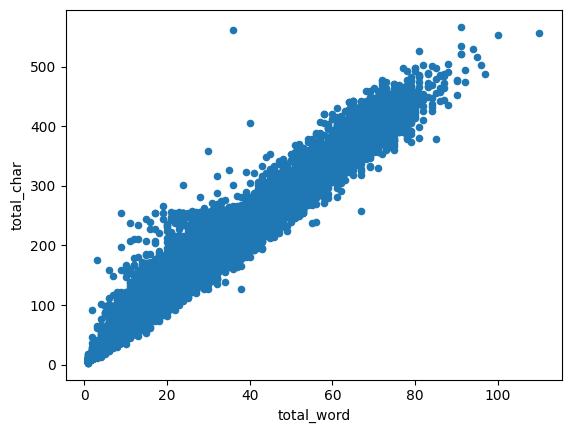

In [ ]:
df.plot(x="total_word", y="total_char", kind="scatter")

### Bar

<Axes: xlabel='label'>

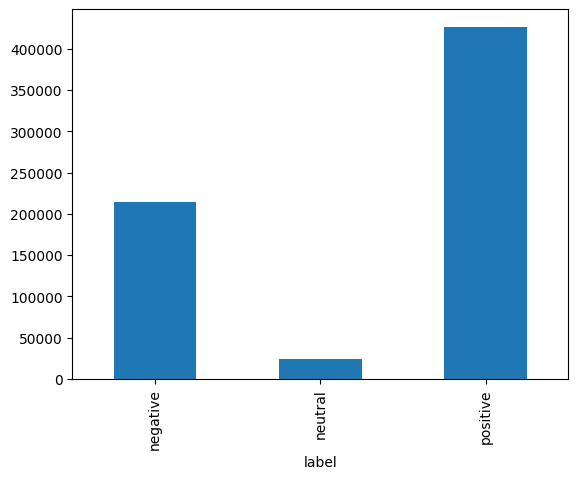

In [ ]:
df.groupby('label').total_word.sum().plot(kind='bar')

# Data Cleansing

In [ ]:
import re
import pandas as pd
import string
import nltk
nltk.download('stopwords')
nltk.download('punkt')
import re
from nltk.corpus import stopwords

stop_words = set(stopwords.words('indonesian'))

def cleansing(sent):
  string = sent.lower()
  string = re.sub(r'[^a-zA-z0-9]',' ', string)
  string = re.sub(r'[^\w]',' ', string)

  words = nltk.word_tokenize(string)
  words = [word for word in words if word not in stop_words]

  text = ' '.join(words)
  return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
df.columns

Index(['text', 'label', 'total_char', 'total_word'], dtype='object')

In [ ]:
df.shape

(26929, 4)

In [ ]:
df['text'] = df.text.apply(cleansing)
df.tail()

,text,label,total_char,total_word
26924,film tncfu cocok penonton suka sadis2,negative,67,12
26925,indihome mahal loh bayar nya penanganan nya la...,negative,72,13
26926,be de gea cowok cupu takut pacar nya pacar nya...,negative,105,23
26927,valen berkualitas konentator nya mendidik jebr...,negative,129,25
26928,restoran pilihan berbuka puasa minggu pelayana...,positive,186,32


In [ ]:
data_preprocessed = df.text.tolist()
type(data_preprocessed)

list

In [ ]:
len(data_preprocessed)

26929

# Features Extraction

In [ ]:
# from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

count_vect = TfidfVectorizer()
# count_vect = CountVectorizer()
count_vect.fit(data_preprocessed)

X = count_vect.transform(data_preprocessed)
print("Feature Extraction Done !")

Feature Extraction Done !


In [ ]:
import pickle

pickle.dump(count_vect, open("feature.p", "wb"))

# Test Split 

In [ ]:
from sklearn.model_selection import train_test_split

classes = df.label
classes

0         neutral
1        positive
2         neutral
3        positive
4        positive
           ...   
26924    negative
26925    negative
26926    negative
26927    negative
26928    positive
Name: label, Length: 26929, dtype: object

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, classes, test_size= 0.2)

# Modeling

## Simple NN , MLP

In [ ]:
#training
from sklearn.neural_network import MLPClassifier

model_mlp = MLPClassifier()
model_mlp.fit(X_train, y_train)

print("Training Selesai !")

Training Selesai !


In [ ]:
pickle.dump(model_mlp, open("model_mlp.p", "wb"))

In [ ]:
#evaluations
from sklearn.metrics import classification_report


test = model_mlp.predict(X_test)

print("Testing Selesai !")

print(classification_report(y_test, test))

Testing Selesai !
              precision    recall  f1-score   support

    negative       0.81      0.82      0.81      2321
     neutral       0.77      0.57      0.66       308
    positive       0.83      0.84      0.83      2757

    accuracy                           0.82      5386
   macro avg       0.80      0.74      0.77      5386
weighted avg       0.82      0.82      0.81      5386



In [ ]:
#predict
original_text = '''
jelek

'''

text = count_vect.transform([cleansing(original_text)])

result = model_mlp.predict(text)[0]
print("Sentiment: ", result)

Sentiment:  positive


## RNN

In [ ]:
df.head()

,text,label,total_char,total_word
0,nikmati cicilan 0 12 pemesanan tiket pesawat a...,neutral,98,16
1,kue kue disajikan bikin bernostalgia tipikal k...,positive,151,22
2,grab indonesia,neutral,36,6
3,suka banget makan siang ayam sambalnya enak ba...,positive,355,57
4,pelayanan bus damri,positive,31,5


In [ ]:
df.label.value_counts()

positive    13597
negative    11726
neutral      1606
Name: label, dtype: int64

In [ ]:
neg = df.loc[df['label']=='negative'].text.tolist()
pos = df.loc[df['label']=='positive'].text.tolist()
net = df.loc[df['label']=='neutral'].text.tolist()


neg_label = df.loc[df['label']=='negative'].label.tolist()
pos_label = df.loc[df['label']=='positive'].label.tolist()
net_label = df.loc[df['label']=='neutral'].label.tolist()

total_data = pos+neg+net
labels = pos_label+neg_label + net_label

In [ ]:
import pickle 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from collections import defaultdict

max_features = 100000
tokenizer = Tokenizer(num_words=max_features, split= ' ', lower=True)
tokenizer.fit_on_texts(total_data)
with open('tokenizer.pickle','wb') as handle:
  pickle.dump(tokenizer, handle, protocol= pickle.HIGHEST_PROTOCOL)
  print("tokenizer.pickle has created !")

X = tokenizer.texts_to_sequences(total_data)

vocab_size = len(tokenizer.word_index)
maxlen = max(len(x) for x in X)

X = pad_sequences(X)
with open('x_pad_sequences.pickle','wb') as handle:
  pickle.dump(X, handle, protocol = pickle.HIGHEST_PROTOCOL)
  print('x_pad_sequences.pickle has created !')

tokenizer.pickle has created !
x_pad_sequences.pickle has created !


In [ ]:
Y = pd.get_dummies(labels)
Y = Y.values

with open('y_labels.pickle','wb') as handle:
  pickle.dump(Y, handle, protocol = pickle.HIGHEST_PROTOCOL)
  print('y_labels.pickle has created !')

y_labels.pickle has created !


In [ ]:
from sklearn.model_selection import train_test_split

file = open('x_pad_sequences.pickle','rb')
X = pickle.load(file)
file.close()

file = open('y_labels.pickle','rb')
Y = pickle.load(file)
file.close()

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state=1)

In [ ]:
#training
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, SimpleRNN, Activation
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.layers import Flatten
from tensorflow.keras import backend as K

embed_dim = 100
units = 64

model_rnn = Sequential()
model_rnn.add(Embedding(max_features, embed_dim, input_length=X.shape[1]))
model_rnn.add(SimpleRNN(units, dropout=0.2))
model_rnn.add(Dense(3, activation='softmax'))

sgd = optimizers.Adam(lr=0.001)
model_rnn.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model_rnn.summary())

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
history = model_rnn.fit(X_train, y_train, epochs=10, batch_size=10, validation_data=(X_test, y_test), verbose=1, callbacks=[es])

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 114, 100)          10000000  
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 64)                10560     
                                                                 
 dense_1 (Dense)             (None, 3)                 195       
                                                                 
Total params: 10,010,755
Trainable params: 10,010,755
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
2155/2155 [==============================] - 568s 263ms/step - loss: 0.5508 - accuracy: 0.7667 - val_loss: 0.4287 - val_accuracy: 0.8387
Epoch 2/10
2155/2155 [==============================] - 581s 270ms/step - loss: 0.2200 - accuracy: 0.9192 - val_loss: 0.4885 - val_accuracy: 0.8292
Epoch

In [ ]:
model_rnn.save('model_rnn.h5')
print("Model has Creqated !")

Model has Creqated !


In [ ]:
#evaluation 
from sklearn import metrics 

predictions = model_rnn.predict(X_test)
y_pred= predictions
matrix_test = metrics.classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print("Testing Done !")
print(matrix_test)

169/169 [==============================] - 2s 14ms/step
Testing Done !
              precision    recall  f1-score   support

           0       0.77      0.76      0.77      2274
           1       0.75      0.46      0.57       353
           2       0.78      0.82      0.80      2759

    accuracy                           0.77      5386
   macro avg       0.77      0.68      0.71      5386
weighted avg       0.77      0.77      0.77      5386



In [ ]:
#prediction
import re
from keras.models import load_model 
input_text = '''
barangnya jelek
'''
sentiment = ['positive','negative','neutral']

text = [cleansing(input_text)]
predicted = tokenizer.texts_to_sequences(text)
guess = pad_sequences(predicted, maxlen=X.shape[1])

model1 = load_model('/content/model_rnn.h5')
prediction= model1.predict(guess)
polarity = np.argmax(prediction[0])

print("Text: ", text[0])
print("Sentiment: ", sentiment[polarity])

1/1 [==============================] - 1s 763ms/step
Text:  barangnya jelek
Sentiment:  neutral


## LSTM

In [ ]:
#training
import numpy as np
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, SimpleRNN, Activation
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import EarlyStopping, TensorBoard
from tensorflow.keras.layers import Flatten
from tensorflow.keras import backend as K

embed_dim = 100
units = 64

model_lstm = Sequential()
model_lstm.add(Embedding(max_features, embed_dim, input_length=X.shape[1]))
model_lstm.add(LSTM(units, dropout=0.2))
model_lstm.add(Dense(3, activation='softmax'))

adam = optimizers.Adam(lr=0.001)
model_lstm.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
print(model_lstm.summary())

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
history = model_lstm.fit(X_train, y_train, epochs=10, batch_size=10, validation_data=(X_test, y_test), verbose=1, callbacks=[es])

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 114, 100)          10000000  
                                                                 
 lstm (LSTM)                 (None, 64)                42240     
                                                                 
 dense_2 (Dense)             (None, 3)                 195       
                                                                 
Total params: 10,042,435
Trainable params: 10,042,435
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
2155/2155 [==============================] - 655s 303ms/step - loss: 0.4720 - accuracy: 0.8038 - val_loss: 0.3888 - val_accuracy: 0.8457
Epoch 2/10
2155/2155 [==============================] - 676s 314ms/step - loss: 0.2210 - accuracy: 0.9169 - val_loss: 0.4322 - val_accuracy: 0.8351
Epoch

In [1]:
model_lstm.save('model_lstm.h5')
print("Model has Creqated !")

NameError: ignored

In [ ]:
#evaluation
from sklearn import metrics 

predictions = model_lstm.predict(X_test)
y_pred= predictions
matrix_test = metrics.classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1))
print("Testing Done !")
print(matrix_test)

In [ ]:
#prediction
import re
from keras.models import load_model 
input_text = '''
produknya kacau
'''
sentiment = ['positive','negative','neutral']

text = [cleansing(input_text)]
predicted = tokenizer.texts_to_sequences(text)
guess = pad_sequences(predicted, maxlen=X.shape[1])

model2 = load_model('/content/model_lstm.h5')
prediction= model2.predict(guess)
polarity = np.argmax(prediction[0])

print("Text: ", text[0])
print("Sentiment: ", sentiment[polarity])